# Time Series Analysis

Z. Ivezic (2018) and M. Juric (2017), with materials from Richards, Connolly; Chapter 10. in the textbook.

# Preparations

- make sure that `pymc` is installed:  
```
conda install pymc
```
- install these two packages:
```
pip install gatspy
pip install supersmoother
```

From http://www.astroml.org/gatspy/:

![Gatspy web page](figures/gatspy.png)

# Time Series Analysis

Time series analysis is, in many ways, very similar to regression analysis that we'll hear about in ~two weeks, except that we replace $x$ with $t$.  There, we will generally assume that the $y$ values are independent, whereas for time series $y_{i+1}$ is likely to depend directly on $y_i$.  Furthermore, we make no assumptions about the regularity of the time sampling.

Eyer and Mowlavi (2007, arXiv:0712.3797) 
<img src="figures/EyerMowlavi2007.png" style="float: left; width: 90%; margin-right: 1%;"> 

There is a broad range of variability signatures that we want to be aware of. From transient events to periodic variables to stochastic sources.

<img src="figures/flare.png" style="float: left; width: 30%; margin-right: 1%;"> <img src="figures/cepheid.png" style="float: left; width: 30%; margin-right: 1%;"> <img src="figures/eclipsing.png" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">

## Goals

When dealing with time series data, the first thing that we want to know is if the system that we are studying is even variable (otherwise, there is no point doing time series analysis!).  In the context of frequentist statistics, this is a question of whether our data would have been obtained by chance if the no-variability null hypothesis were correct.

If we find that our source *is* variable, then our time-series analysis has two main goals:
1. Characterize the temporal correlation between different values of $y$ (i.e., characterize the "light curve").  For example by learning the parameters for a model.
2. Predict future values of $y$.

If the errors are known and Gaussian, we can simply compute $\chi^2$ and the corresponding $p$ values for variation in a signal.

For a sinusoidal variable signal

$$y(t) = Y_o + A \sin(\omega t)$$

with constant errors, $\sigma$, then variance is $V = \sigma^2 + A^2/2$. Note that Y_o doesn't 
contribute to this variance (because it's "just a constant"). 
    
If $A=0$ (no variability) we expect: 
* $\chi^2_{\rm dof}=\frac{1}{N} \sum_j \left(\frac{y_j}{\sigma}\right)^2 \sim V/\sigma^2$.
* $\chi^2_{\rm dof}$ has  expectation value of 1 and std dev  of $\sqrt\frac{2}{N}$

 



If $|A|>0$ (variability) we expect that:
- $\chi^2_{\rm dof}$ will be larger
than 1. 
-  when A=0, probability that $\chi^2_{\rm dof}>1 + 3 \sqrt{2/N}$  is about 1 in 1000 (i.e., $>3\sigma$ above 1)

If this false-positive rate is acceptable (even without variability, 1 times in 1000 we will observe a $\chi^2_{\rm dof}$ above this threshold) then the **minimum detectable amplitude** is:

$$A > \left( \frac{72}{N} \right)^\frac{1}{4} \sigma \approx 2.9 \sigma N^{-{1 \over 4}}$$

which follows from equating $V/\sigma^2=1 + 3 \sqrt{2/N}$, expanding $V$, and solving for $A$.

For $N=100$ data points, the minimum detectable amplitude is $A=0.92\sigma$

For $N=1000$, $A = 0.52\sigma$ 

That is, if we have enough data points, we can actually detect variability whose amplitude is smaller than the uncertainty in the measurements.

Note that is the best that we can do under the assumption of the null hypothesis of no variability.  If instead we know the model (not limited to periodic variability), then we can perform a [**"matched filter"**](https://en.wikipedia.org/wiki/Matched_filter) analysis and improve upon this (i.e., we can positively identify lower-amplitude variability).  Indeed in a Bayesian analysis, we must have a model in mind.

For non-periodic variability, the system can either be **stochastic** (like the stock market) or **temporally localized** (such as a flare/burst).

## Parameter Estimation, Model Selection, and Classification

Time series analysis can be conducted in either the time domain or the frequency domain.  We'll first start with a discussion of the time domain by using tools that we already discussed, such as model parameter estimation.
 

We can fit a model to $N$ data points $(t_i,y_i)$:

$$y_i(t_i) = \sum_{m=1}^M \beta_m T_m(t_i|\theta_m) + \epsilon_i,$$

where the functions, $T_m$, do not need to be periodic, $t_i$ does not need to be evenly sampled and $\theta_m$ are the model parameters.

So, for example, if we have

$$y_i(t_i) = a \sin(\omega_0 t_i) + b \cos (\omega_1 t_i),$$

then $a=\beta_0$, $b=\beta_1$, $\omega_0=\theta_0$, and $\omega_1 = \theta_1$.

Determining whether a variable model is favored over a non-variable model is the same as we have dealt with previously and can also be approached using the AIC, BIC, or Bayesian odds ratio.  Once the model parameters, $\theta_m$ have been determined, we can further apply supervised or unsupervised classification methods (to be discussed in a few weeks) to gain further insight.

Common deterministic models include

$$T(t) = \sin(\omega t)$$

and

$$T(t) = \exp(-\alpha t),$$

where the frequency, $\omega$, and decay rate, $\alpha$, are parameters to be estimated from the data.

We will also explore a more complicated so-called "chirp" signal with

$$T(t) = \sin(\phi + \omega t + \alpha t^2).$$

(another way of thinking of a chirp is that the *frequency varies with time*; $\omega_{\rm instantaneous} = \omega + \alpha t$)

## Fourier Analysis

Fourier Analysis has the potential to be the subject for an entire class as opposed to part of a single lecture. 

The code below demostrates an application that you are surely familiar with: reconstruction of a complicated signal by summation of simple trigonometric functions: 

$$y_i(t_i) = Y_o + \sum_{m=1}^M \beta_m \sin(m \omega t_i + \phi_m)   + \epsilon_i.$$

Note: **any** periodic function can be described within noise with a sufficiently large M! 


In [8]:
# The dataset that astroML points to has moved;
# we have to re-point astroML to the right URL
import astroML.datasets.rrlyrae_templates
astroML.datasets.rrlyrae_templates.DATA_URL = ("http://www2.mpia-hd.mpg.de/~bsesar/S82_RRLyr/RRLyr_ugriz_templates.tar.gz")

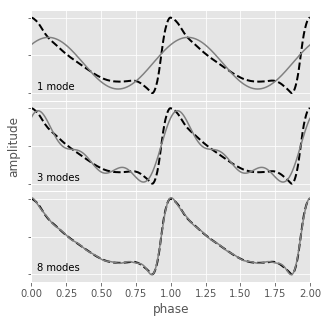

In [9]:
%matplotlib inline
# Ivezic, Figure 10.1
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import fetch_rrlyrae_templates

#------------------------------------------------------------
# Load the RR Lyrae template
templates = fetch_rrlyrae_templates()
x, y = templates['115r'].T

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0)

kvals = [1, 3, 8]
subplots = [311, 312, 313]

for (k, subplot) in zip(kvals, subplots):
    ax = fig.add_subplot(subplot)

    # Use FFT to fit a truncated Fourier series
    # reconstruct using k frequencies
    y_fft = np.fft.fft(y) # compute FFT
    y_fft[k + 1:-k] = 0 # zero-out frequencies higher than k
    y_fit = np.fft.ifft(y_fft).real # reconstruct using k modes

    # plot the true value and the k-term reconstruction
    ax.plot(np.concatenate([x, 1 + x]),
            np.concatenate([y, y]), '--k', lw=2)
    ax.plot(np.concatenate([x, 1 + x]),
            np.concatenate([y_fit, y_fit]), color='gray')

    label = "%i mode" % k
    if k > 1:
        label += 's'

    ax.text(0.02, 0.1, label, ha='left', va='bottom',
            transform=ax.transAxes)

    if subplot == subplots[-1]:
        ax.set_xlabel('phase')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    if subplot == subplots[1]:
        ax.set_ylabel('amplitude')
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlim(0, 2)
    ax.set_ylim(1.1, -0.1)

plt.show()

The Fourier Transform can be powerful if the signal-to-noise is high (and noise is Gaussian and homoscedastic), 
but if not or if the signal has a complex shape or is irregularly sampled, then a probabilistic approach is better.  In astronomy, that is often the situation that we find ourselves in.  So, I'll leave the details for you to read about in $\S$ 10.2 and we'll skip ahead.

## Temporally Localized Signals ($\S$ 10.4)

Let's begin with the case of a stationary signal with an event localized in time.
An example would be the signature of a [gravitational wave from LIGO](https://www.ligo.caltech.edu/news/ligo20160615).

In this case we know the expected shape of the signal and the noise properties are understood, so we can do what is called *forward modeling*.  Specifically, we will identify the signal by using a **matched filter** (with MCMC to search for the parameter covariances).

Even if we didn't know the shape of the distribution, we could use a non-parametric form to perform matched filter analysis.  Furthermore, for complex signals we can marginalize over "nuisance" parameters (e.g. start time or phase) that are not important for our model.

## Finding a chirp or burst in a time series

Imagine a stationary signal $y(t)=b_0+\epsilon$ with an injected signal at time $T$ (possibly followed by a decay to the original level $b_0$ over some unknown time period).

This injected signal could be a "burst"

$$y(t)=b_0 + A\exp[−\alpha(t−T)]$$

(your homework!) or a ["chirp"](https://en.wikipedia.org/wiki/Chirp)

$$y(t)=b_0+A \sin[\omega t+\beta t^2].$$

Below is an example of using MCMC to fit a chirp signal.

Try changing the parameters such that the system is 1) very well modeled and 2) very poorly modeled.

 [-----------------100%-----------------] 20000 of 20000 complete in 4.0 sec

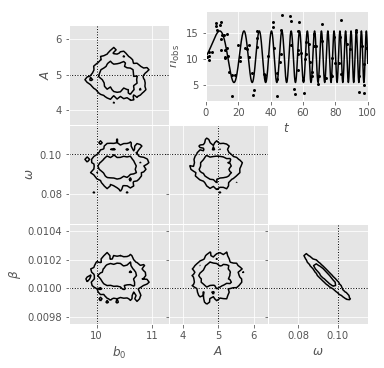

In [10]:
# Ivezic, Figure 10.26
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

# Hack to fix import issue in older versions of pymc
import scipy
import scipy.misc
scipy.derivative = scipy.misc.derivative
import pymc

from astroML.plotting.mcmc import plot_mcmc

#----------------------------------------------------------------------
# Set up toy dataset
def chirp(t, b0, beta, A, omega):
    return b0 + A * np.sin(omega * t + beta * t * t)

np.random.seed(0)

# Change these parameters to see what effect they have on how
# well the system can be modeled.
N = 100
b0_true = 10
A_true = 5
beta_true = 0.01
omega_true = 0.1
sigma = 2.0

# Number of iterations of the fitter
niter = 20000

t = 100 * np.random.random(N)

y_true = chirp(t, b0_true, beta_true, A_true, omega_true)
y_obs = np.random.normal(y_true, sigma)

t_fit = np.linspace(0, 100, 1000)
y_fit = chirp(t_fit, b0_true, beta_true, A_true, omega_true)

i = np.argsort(t)

#----------------------------------------------------------------------
# Set up MCMC sampling
b0 = pymc.Uniform('b0', 0, 50, value=50 * np.random.random())
A = pymc.Uniform('A', 0, 50, value=50 * np.random.random())
log_beta = pymc.Uniform('log_beta', -10, 10, value=-4.6)
log_omega = pymc.Uniform('log_omega', -10, 10, value=-2.3)

# uniform prior on log(beta)
@pymc.deterministic
def beta(log_beta=log_beta):
    return np.exp(log_beta)

# uniform prior on log(omega)
@pymc.deterministic
def omega(log_omega=log_omega):
    return np.exp(log_omega)

@pymc.deterministic
def y_model(t=t, b0=b0, A=A, beta=beta, omega=omega):
    return chirp(t, b0, beta, A, omega)

y = pymc.Normal('y', mu=y_model, tau=sigma ** -2, observed=True, value=y_obs)

model = dict(b0=b0, A=A,
             log_beta=log_beta, beta=beta,
             log_omega=log_omega, omega=omega,
             y_model=y_model, y=y)

#----------------------------------------------------------------------
# Run the MCMC sampling (saving results to a pickle)
def compute_MCMC_results(niter=niter, burn=2000):
    S = pymc.MCMC(model)
    S.sample(iter=niter, burn=burn)
    traces = [S.trace(s)[:] for s in ['b0', 'A', 'omega', 'beta']]

    M = pymc.MAP(model)
    M.fit()
    fit_vals = (M.b0.value, M.beta.value, M.A.value, M.omega.value)

    return traces, fit_vals

traces, fit_vals = compute_MCMC_results()

labels = ['$b_0$', '$A$', r'$\omega$', r'$\beta$']
limits = [(9.5, 11.3), (3.6, 6.4), (0.065, 0.115), (0.00975, 0.01045)]
true = [b0_true, A_true, omega_true, beta_true]

#----------------------------------------------------------------------
# Find the Maximum a posteriori values
fig = plt.figure(figsize=(5, 5))

ax = plt.axes([0.5, 0.7, 0.45, 0.25])
t_fit = np.linspace(0, 100, 1001)
y_fit = chirp(t_fit, *fit_vals)
plt.scatter(t, y_obs, s=9, lw=0, c='k')
plt.plot(t_fit, y_fit, '-k')
plt.xlim(0, 100)
plt.xlabel('$t$')
plt.ylabel(r'$h_{\rm obs}$')

# This function plots multiple panels with the traces
plot_mcmc(traces, labels=labels, limits=limits, true_values=true, fig=fig,
          bins=30, bounds=[0.12, 0.08, 0.95, 0.91], colors='k')
plt.show()

## Periodic signals ($\S$ 10.3)

Many systems have **periodic** signals.  This is especially true in astronomy (e.g., RR-Lyrae, Cepheids, eclipsing binaries).

What we want to be able to do is to detect variability and measure the period in the face of both noisy and incomplete data.

For example, the figure on the left is the kind of data that you *want* to have, whereas the figure on the right is the kind of data that you are more likely to have.
<img src="figures/rrlyrae-good.png" style="float: left; width: 40%; margin-right: 1%;"> <img src="figures/rrlyrae-bad.png" style="float: left; width: 40%; margin-right: 1%;">

For a periodic signal we have:

$$y(t+P)=y(t),$$ where $P$ is the period.

We can create a *phased light curve* that plots the data as function of phase:

$$\phi=\frac{t}{P} - {\rm int}\left(\frac{t}{P}\right),$$

where ${\rm int}(x)$ returns the integer part of $x$.

For example in the case below, when the pattern starts to repeat, we reset the $t$ axis to 0:

<img src="figures/NASAeclipsing.png" style="float: left; width: 80%; margin-right: 1%;">  

### A Single Sinusoid

Let's take the case where the data are drawn from a single sinusoidal signal:

$$y(t)=A \sin(\omega t+\phi)+\epsilon$$

and determine whether or not the data are indeed consistent with periodic variability and, if so, what is the period.

We can use trig identies to rewrite the model as

$$y(t)=a \sin(\omega t)+b \cos(\omega t)+\epsilon,$$

where $A=(a^2+b^2)^{1/2}$ and $\phi=\tan^{-1}(b/a)$.

The model is now linear with respect to coefficients $a$ and $b$ (and nonlinear only with respect to frequency, $\omega$).  We now seek to determine the values of those parameters.


### The Likelihood and the Posterior

Assuming constant uncertainties on the data the likelihood for this model becomes,

$$L\equiv p({t,y}|\omega,a,b,\sigma)=\prod^N_{j=1}\frac{1}{\sqrt{2\pi}\sigma} \exp \left(\frac{-[y_j-a \sin(\omega t_j)-b \cos(\omega t_j)]^2}{2\sigma^2} \right). $$

where $y_i$ is the measurement (e.g., the brightness of a star) taken at time $t_i$.

Assuming uniform priors on $a, b, \omega$, and $\sigma$ (which gives nonuniform priors on $A$ and $\phi$!) the posterior can be written as

$$p(\omega,a,b,\sigma|{t,y}) \propto \sigma^{-N} \exp \left(\frac{-NQ}{2\sigma^2} \right).$$

The posterior:

$$p(\omega,a,b,\sigma|{t,y}) \propto \sigma^{-N} \exp \left(\frac{-NQ}{2\sigma^2} \right).$$

where

>$Q= V - {2\over N} \left[ a \, I(\omega) + b \, R(\omega) - a\, b\, M(\omega) - {1 \over 2} a^2 \, S(\omega) - {1 \over 2} b^2 \,C(\omega)\right]$

and

>$            V = {1\over N} \sum_{j=1}^N y_j^2$

>$       I(\omega) = \sum_{j=1}^N y_j   \sin(\omega t_j)$

>$ R(\omega) = \sum_{j=1}^N y_j  \cos(\omega t_j)$

>$      M(\omega) = \sum_{j=1}^N \sin(\omega t_j) \, \cos(\omega t_j)$

>$      S(\omega) = \sum_{j=1}^N \sin^2(\omega t_j)$

>$C(\omega) = \sum_{j=1}^N  \cos^2(\omega t_j)$

**NOTE:** V, I, R, M, S, C only depend on $\omega$ and data.

### The posterior for many, randomly spaced, observations

If $N \gg 1$ and we have data that extends longer than the period and hasn't been taken at special times, we have:

$S(\omega) \approx C(\omega) \approx N/2$ and $M(\omega) \ll N/2$ and

>$Q \approx V - {2\over N} \left[ a \, I(\omega) + b \, R(\omega)\right]  + {1 \over 2} (a^2 + b^2)$

If we marginalize over $a$ and $b$ (as we are interested in the period)

>$  p(\omega,\sigma|\{t,y\}) \propto  \sigma^{-(N-2)} \exp \left( { - N V \over 2 \sigma^2} + { P(\omega) \over \sigma^2}       \right)$

with $P(\omega) = {1 \over N} [ I^2(\omega) + R^2(\omega)]$

if we know the noise $\sigma$ then 

>$   p(\omega|\{t,y\}, \sigma) \propto \exp \left( { P(\omega) \over \sigma^2} \right)$

and we now have the posterior for $\omega$!

The simplified posterior for $\omega$ comes out to be

$$ p(\omega|\{t,y\}, \sigma) \propto \exp \left(\frac{P(\omega)}{\sigma^2} \right),$$

where

$$P(\omega) = {1 \over N} [ I^2(\omega) + R^2(\omega)]$$

$$ I(\omega) = \sum_{j=1}^N y_j   \sin(\omega t_j), \; \; \; R(\omega) = \sum_{j=1}^N y_j  \cos(\omega t_j)$$

is the [periodogram](https://en.wikipedia.org/wiki/Periodogram), which is just a plot of the "power" at each possible period (as illustrated below): 

<img src="figures/periodogram.png">

### Significance of the peaks in the periodogram

The amplitude(s) of the periodic signal can be derived from the posterior in much the same way as we do for MLE, by taking the derivative of the posterior with respect to $a$ and $b$.

But what we really want to know is the "best value" of $\omega$! 

The $\chi^2$ is given by
$$\chi^2(\omega) \equiv {1 \over {\sigma^2}} \sum_{j=1}^N [y_j-y(t_j)]^2 =
  {1 \over {\sigma^2}} \sum_{j=1}^N [y_j- a_0\, \sin(\omega t_j) - b_0 \, \cos(\omega t_j)]^2,$$
  
which we can simplify (see the textbook) to

$$\chi^2(\omega) =  \chi_0^2 \, \left[1 - {2 \over N \, V}  \, P(\omega) \right],$$

where, again, $P(\omega)$ is the periodogram and $\chi_0^2$ is the $\chi^2$ for a model with $y(t)$=constant:

$$  \chi_0^2 = {1 \over {\sigma^2}} \sum_{j=1}^N y_j^2 = {{N \, V} \over {\sigma^2}}$$

We'll now renormalise the periodogram, defining the [Lomb-Scargle periodogram](https://en.wikipedia.org/wiki/Least-squares_spectral_analysis#The_Lomb.E2.80.93Scargle_periodogram) as

$$P_{\rm LS}(\omega) = \frac{2}{N V} P(\omega),$$

One can show that $0 \le P_{\rm LS}(\omega) \le 1$.

With this renormalization, the reduction in $\chi^2(\omega)$ for the harmonic model, 
relative to $\chi^2$ for the pure noise model, $\chi^2_0$ is
$${\chi^2(\omega) \over \chi^2_0}=  1 - P_{LS}(\omega).$$


To determine if our source is variable or not, we first compute $P_{\rm LS}(\omega)$ and then model the odds ratio for our variability model vs. a no-variability model.

If our variability model is "correct", then the peak of $P(\omega)$ [found by grid search] gives the best $\omega$ and the $\chi^2$ at $\omega = \omega_0$ is $N$.

If the true frequency is $\omega_0$ then the maximum peak in the periodogram should have a height

$$P(\omega_0) = {N \over 4} (a_0^2 + b_0^2)$$

and standard deviation
$$      \sigma_P(\omega_0)  = {{\sqrt{2}} \over 2} \, {\sigma^2}.$$

### Properties of LS and the periodogram

Some properties of Lomb-Scargle and the periodogram:
- The expected heights of the peaks in a periodogram don't depend on $\sigma$ but their variation in height do.
- For $P_{\rm LS}(\omega_0)$, with no noise the peak approaches 1. As noise increases, $P_{\rm LS}(\omega_0)$ decreases and is ``buried'' in the background  noise.
- To estimate the uncertainty on the peaks we can use a bootstrap approach.

### Example

Below is an example of a LS periodogram generated using 100 points drawn from $y(t|P) = 10 + \sin(2\pi t/P),$ with $P=0.3$.  

[http://www.astroml.org/gatspy/periodic/lomb_scargle.html](http://www.astroml.org/gatspy/periodic/lomb_scargle.html) gives more information on astroML's implementation.

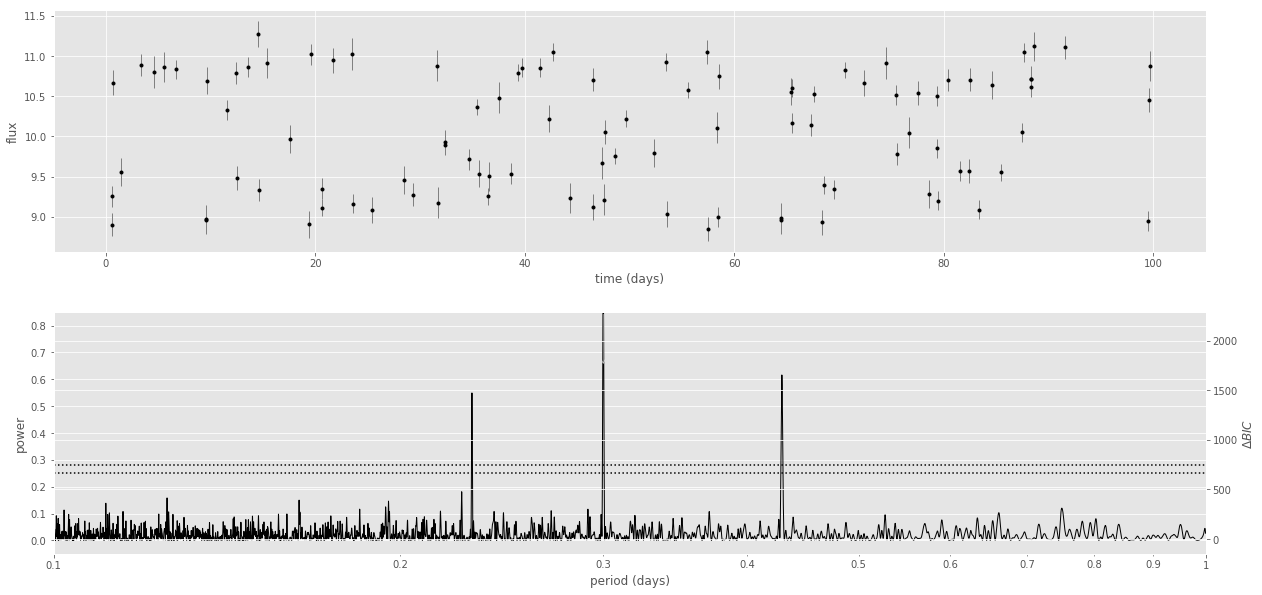

In [11]:
# Similar to Figure 10.15
# Author: Jake VanderPlas
# License: BSD
from matplotlib import pyplot as plt
from astroML.time_series import\
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#------------------------------------------------------------
def simulated_data():
    
    np.random.seed(0)
    N = 100
    P = 0.3

    t = np.random.randint(100, size=N) + 0.3 + 0.4 * np.random.random(N)
    y = 10 + np.sin(2 * np.pi * t / P)
    dy = 0.1 + 0.1 * np.random.random(N)
    y_obs = np.random.normal(y, dy)
    return t, y_obs, dy 
    
# Generate Data
t, y_obs, dy = simulated_data()

#------------------------------------------------------------
# Compute periodogram
period = 10 ** np.linspace(-1, 0, 10000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get false alarm probability via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
FPA1, FPA2 = np.percentile(D, [99, 99.9])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
ax.set_xlim(-5, 105)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
ax1.plot([period[0], period[-1]], [FPA1, FPA1], ':', c='black')
ax1.plot([period[0], period[-1]], [FPA2, FPA2], ':', c='black')

ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',
             arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
ax1.set_ylim(-0.05, 0.85)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

plt.show()

If that isn't impressive, try changing the period to 5-10 days and the number of points to 200-300 (you'll need to increase `period` as appropriate) to compare this to a situation that is more obvious.  Now are you impressed?

## False Alarm Probability

Is there a chance that these peaks are due to random fluctuations and that 
underlying time series is simply noise? 

It is hard to answer this question with simple analytic expressions (this is a 
complex case involving multiple hypothesis testing and a window function).
For details see "Understanding the Lomb-Scargle Periodogram" by Jake VanderPlas
(2017, [arXiv:1703.09824](https://arxiv.org/abs/1703.09824)). 

Fortunately, we can compute false alarm probability using numerical methods.

## False Alarm Probability

The two horizontal dashed lines in the periodogram above correspond to FAPs of
0.01 and 0.001. 

FAP is **not** the probability that we really found the correct period of a variable object.

Rather, it is probability that we would get the strongest periodogram peak that high
from a time series that was pure noise. 

To get the model probability ratio of variable star vs. noise (constant flux), we need to take into
account their prior probabilities (Bayes!): 

$$ {p(Var\,|\,Peak) \over p(Const\,|\,Peak)} = {p(Peak\,|\, Var) \over p(Peak\,|\,Const)} \, {p(Var) \over p(Const)}.
$$

Here FAP corresponds to $p(Peak\,|\,Const)$, and with $p(Peak\,|\, Var) \sim 1$, we have

$$ {p(Var\,|\,Peak) \over p(Const\,|\,Peak)} = {1 \over FAP} \, {p(Var) \over p(Const)}. $$

The ratio of priors [p(Var)/p(Const)] is the fraction of variable stars in the studied population. 
It is typically a few percent (of the order 0.01) - therefore, in order to have a reliable detection of
period (say, LHS $>$10), FAP should be at least as small as 0.001. 

## False Alarm Probability

The two horizontal dashed lines in the periodogram above correspond to FAPs of
0.01 and 0.001. 

These FAPs were computed using a bootstrap method. Lomb-Scargle implementation 
in astropy includes several other methods (much faster but less accurate),
as shown next.

**NOTE:** the FAP in a given periodogram is a function of time sampling and
measurement errors - it needs to be (re)computed every time you produce a
new periodogram! 

In [12]:
from astropy.stats import LombScargle
    
def showFAP4LS(t, y, dy):

    ls = LombScargle(t, y, dy, normalization='standard')
    zmax = 0.23
    z = np.linspace(0.001, zmax, 10000)
    
    def false_alarm(method):
        return ls.false_alarm_probability(z, method=method, maximum_frequency=5)

    fa_boot = ls.false_alarm_probability(z, method='bootstrap',
                                         maximum_frequency=5,
                                         method_kwds=dict(random_seed=42))

    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(6, 4.5))
    ax.plot(z, false_alarm('naive'), label='naive estimate')
    ax.plot(z, false_alarm('baluev'), label='Baluev estimate')
    ax.plot(z, false_alarm('davies'), ':k', label='Davies bound')
    ax.plot(z, fa_boot, '-k', label='bootstrap estimate')

    ax.legend(loc='lower left')
    ax.set(yscale='log',
           title='False Alarm Estimates (N=100)',
           xlim=(0, zmax), ylim=(0.001, 1.5),
           xlabel='Value of Highest Periodogram Peak',
           ylabel='False Alarm Probability');

    return 


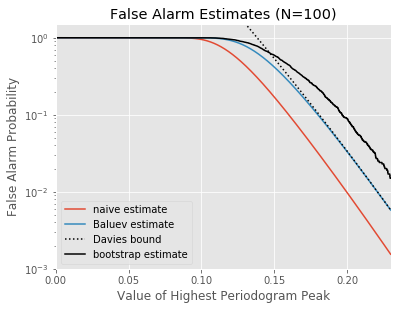

In [13]:
showFAP4LS(t, y_obs, dy)

## Aliasing

But why did we have 3 peaks above the line FAP=0.001??? 

The two most common problems are sampling aliases (e.g. observations spaced 
by roughly 1 day) and inability of a single sinusoid to fit the shape of light
curve (always check if there is another significant peak at twice the best-fit 
period). 

For details see Section 7.2 in "Understanding the Lomb-Scargle Periodogram" 
by Jake VanderPlas (2017, [arXiv:1703.09824](https://arxiv.org/abs/1703.09824)). 

We will discuss here only a single example. 

### Examples of periodic variable stars from LINEAR


<img src="figures/LINEARexample.png" style="float: right; width: 100%; margin-right: 1%;">



### Example of a bad period (with a single sinusoid) 


<img src="figures/LINEARbadfit.png" style="float: right; width: 100%; margin-right: 1%;">



### Generalized Lomb-Scargle

The Lomb-Scargle periodogram is a fit to a model:

$$y(t)=a \sin(\omega t)+b \cos(\omega t),$$

whose mean is zero. In reality, the observed variability is typically around some (mean) value, not zero. We deal with this by subtracting the mean of the sample $\overline{y}$ from the data before performing the periodogram analysis.

That only works if $\overline{y}$ is a good estimator of the mean of the distribution, $y(t)$ -- if the data is equally sampled at all phases. However, in practice, the data may not equally sample all of the phases.



### Generalized Lomb-Scargle


For example, consider the case of a star that has a period of one day and the fact that a single optical telescope only takes data at night. In that case you we might get something like the top panel below:

![Ivezic, Figure 10.16](http://www.astroml.org/_images/fig_LS_sg_comparison_3.png)



The "generalized" Lomb-Scargle approach (also implemented in astroML) can help with this as can be seen in the bottom panel above. It fits the model with non-zero mean:

$$y(t)=a \sin(\omega t)+b \cos(\omega t) + C$$

See also [Figure 10.16](http://www.astroml.org/book_figures/chapter10/fig_LS_sg_comparison.html) in the textbook (and note the erratum!).

### Multiband LS periodograms

One of the issues that we are going to be dealing with in astronomy over the next decade as the LSST project comes online is the problem of sparsely-sampled light curves, but with multiple light curves for each object -- one for each "bandpass" as seen below:

<img src="figures/multibandLS.png" style="float: right; width: 100%; margin-right: 1%;">



The generalized LS was an extension to account for the mean value. We can build on this to account for multiple bands by fitting for a global period, global offset, and a per-band offsets.

$\begin{eqnarray}
  &y_k(t|\omega,\theta) =
  \theta_0 + \sum_{n=1}^{N_{base}} \left[\theta_{2n - 1}\sin(n\omega t) + \theta_{2n}\cos(n\omega t)\right] +&\nonumber
  &\theta^{(k)}_0 + \sum_{n=1}^{N_{band}} \left[\theta^{(k)}_{2n - 1}\sin(n\omega t) + \theta^{(k)}_{2n}\cos(n\omega t)\right].&
\end{eqnarray}$

The total number of parameters for $K$ filters is then $M_K = (2N_{base} + 1) + K(2N_{band} + 1)$. 

To keep the parameters constrained we apply regularization (we'll learn about it when we discuss regression).

The important feature of this model is that _all bands_ share the same base parameters, $\theta$, while their offsets $\theta^{(k)}$ are determined individually.

Below we show the multi-band light curves of an RR Lyrae star as an example.  

A fit with just one base term isn't so great:

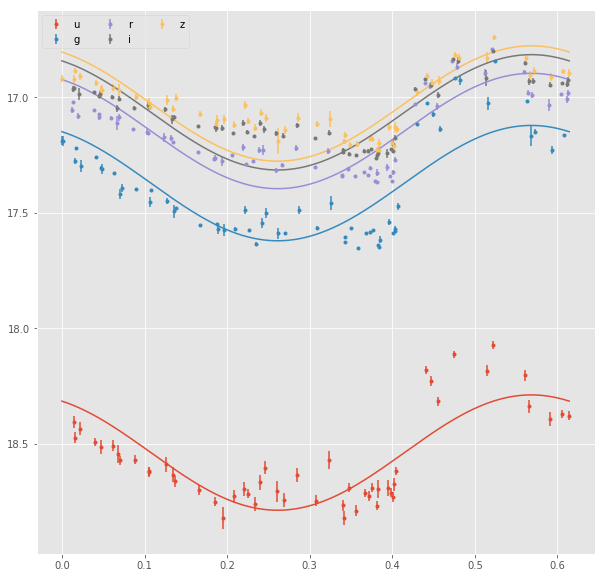

In [14]:
from gatspy.datasets import fetch_rrlyrae
rrlyrae = fetch_rrlyrae()
lcid = rrlyrae.ids[0]

t, y, dy, filts = rrlyrae.get_lightcurve(lcid)
period = rrlyrae.get_metadata(lcid)['P']

from gatspy.periodic import LombScargleMultiband
model = LombScargleMultiband(Nterms_base=1, Nterms_band=0)
model.fit(t, y, dy, filts)
periods = np.linspace(period - 0.1, period + 0.1, 2000)
power = model.periodogram(periods)

def plot_model(model, lcid):
    t, y, dy, filts = rrlyrae.get_lightcurve(lcid)
    model.fit(t, y, dy, filts)
    
    tfit = np.linspace(0, period, 1000)
    for filt in 'ugriz':
        mask = (filts == filt)
        eb = plt.errorbar(t[mask] % period, y[mask], dy[mask], fmt='.', label=filt)
        yfit = model.predict(tfit, filt, period=period)
        plt.plot(tfit, yfit, color=eb[0].get_color())
    plt.gca().invert_yaxis()
    plt.legend(ncol=3, loc='upper left')
    
fig = plt.figure(figsize=(10,10))
plot_model(LombScargleMultiband(Nterms_base=1, Nterms_band=0), lcid)

But with 4 base terms, we get excellent results.  Note that this works well for this case where we don't expect $\omega$ to be bandpass dependent, but it might not work so well for quasars.

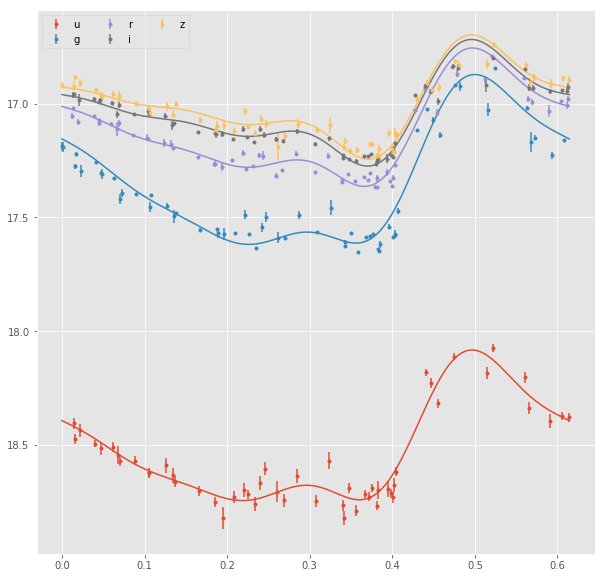

In [15]:
fig = plt.figure(figsize=(10,10))
plot_model(LombScargleMultiband(Nterms_base=4, Nterms_band=1), lcid)

### Multi-band Periodogram

VanderPlas and Ivezic (2015, ApJ 812, 18) 
<img src="figures/VdPIvezic1.png" style="float: left; width: 90%; margin-right: 1%;"> 

<img src="figures/VdPIvezic2.png" style="float: left; width: 75%; margin-right: 1%;"> 

### Preview to Classification

With parameters of a periodic model in hand, we can attempt to classify our sources.  Either using supervised methods if we have labeled examples or unsupervised methods if we do not.

The examples below show that a sample of variable stars can be divided into different groups.  The first plot shows an unsupervised clustering analysis and the second is a supervised GMMB classification.

![Ivezic, Figure 10.20](http://www.astroml.org/_images/fig_LINEAR_clustering_1.png)

![Ivezic, Figure 10.22](http://www.astroml.org/_images/fig_LINEAR_GMMBayes_1.png)